# This assignment provides hands-on data wrangling and classification experience
For this assignment, you are a Machine Learning Engineer at a local bank, and your task is to analyze whether loan applicants qualify, based on their personal information.
Tasks are:
I. Data wrangling to perform one-hot-encoding for the data and normalization
II. Eliminating unimportant features
III. Performing classification to predict qualification for loan in future.

### Import the necessary modules

In [1]:
import os
import tensorflow as tf
#from tensorflow.contrib.tensorboard.plugins import projector
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

### Load the training data. Print out its shape and first few rows.

In [2]:
url = "https://raw.githubusercontent.com/FourthBrain/2.-Classification/main/bank-full.csv?token=ARJV76TWTYENKFZKXB4CUYS7SIDOM"
df_train = pd.read_csv(url, sep=';')
print(np.shape(df_train))
df_train.head()


(45211, 17)


age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

### Exercise: Perform Exploratory Data Analysis on each feature

In [3]:
### START CODE HERE ###
# Get the info (column number and name, non-null count, and dtype) for each column in the training df
df_train.info()
# Get summary statistics for the training df with the describe() method
df_train.describe()
### END CODE HERE ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

### Exercise: Visualize the distributions of each numeric feature

In [6]:
df_train.select_dtypes(include = ['int64']).columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

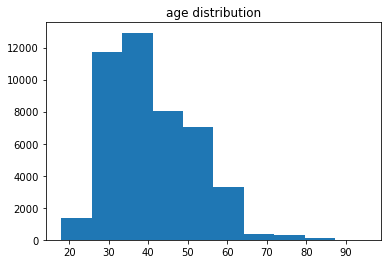

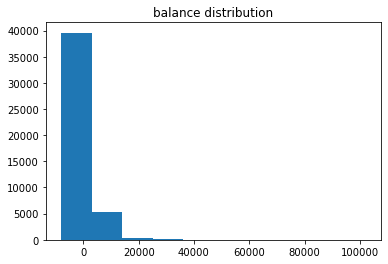

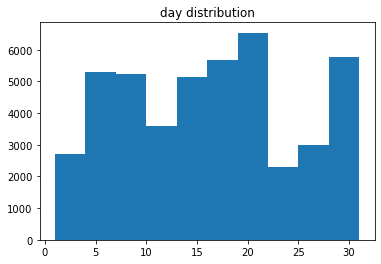

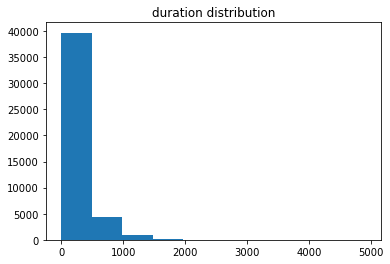

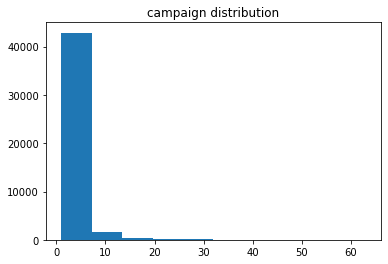

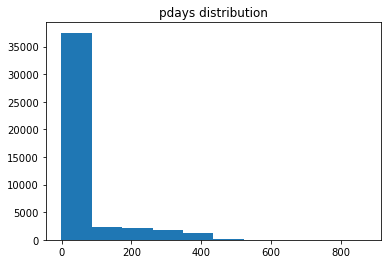

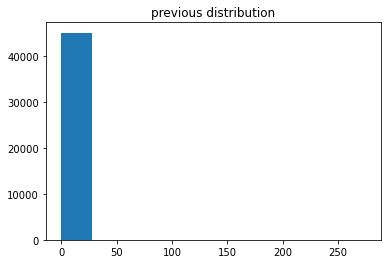

In [7]:
### START CODE HERE ###
# Use a list comprehension to extract the names of the numeric columns of the training df 
# (those with an integer dtype)
numeric_columns = list(df_train.select_dtypes(include = ['int64']).columns)
# Loop through the numeric columns
for col in numeric_columns:
    # Generate a histogram of the current numeric feature column
    plt.hist(df_train[col])
    plt.title(f'{col} distribution')
    plt.show()
### END CODE HERE ###

### Exercise: Inspect the unique values of the non-numeric columns, and their counts

In [27]:
### START CODE HERE ###
# Use a list comprehension to list the names of the non-numeric columns in the training df
# (those with an object dtype)
non_numeric_columns = list(df_train.select_dtypes(exclude = ['int64']).columns)
# Loop through the non-numeric columns
print("The number of unique counts for each columns are as follows : \n")
for col in non_numeric_columns:
    # Print the counts of each unique value in the current column
    print("{} : {}".format(col, len(df_train[col].unique())))
### END CODE HERE ###

The number of unique counts for each columns are as follows : 

job : 12
marital : 3
education : 4
default : 2
housing : 2
loan : 2
contact : 3
month : 12
poutcome : 4
y : 2


### Exercise: Some columns are 'yes'/'no' binaries. Map them to integer binaries.

In [38]:
### START CODE HERE ###
# Make a list of the binary columns. There should be 4 of them. 
# Find their names in the output of the previous exercise.
binary_columns = [col for col in non_numeric_columns if len(df_train[col].unique()) == 2 ]
# Create a dictionary in which the keys map to the values
# Remember, we want to replace 'no' and 'yes' with the appropriate integers
binary_mapping = {'yes' : 1, 
                 'no' : 0}
# Map the binary columns
for col in binary_columns:
    # Apply the mapping to the current column with the map() method for Pandas Series
    df_train[col] = df_train[col].map(binary_mapping)
### END CODE HERE ###

### Exericse: Map the months from strings to integers, with 1 corresponding to January, etc.

In [41]:
df_train['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [42]:
### START CODE HERE ###
# Create the mapping dictionary
# Make sure the months' names are formatted properly
month_mapping = {'may': 5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'jan':1, 'feb':2,
       'mar':3, 'apr':4, 'sep':9}
# Map the months
df_train['month'] = df_train['month'].map(month_mapping)
### END CODE HERE ###

### Exercise: One-hot encode the remaining categorical features

In [62]:
### START CODE HERE ###
# List the categorical features. There should be 5 of them.
categorical_columns = list(df_train.select_dtypes(exclude = ['int64']).columns)
print(categorical_columns)
# One-hot encode the categorical features with the get_dummies() function for Pandas DataFrames
df_train = pd.get_dummies(df_train)
### E3ND CODE HERE ###

['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


In [63]:
df_train

age  default  balance  housing  loan  day  month  duration  campaign  \
0       58        0     2143        1     0    5      5       261         1   
1       44        0       29        1     0    5      5       151         1   
2       33        0        2        1     1    5      5        76         1   
3       47        0     1506        1     0    5      5        92         1   
4       33        0        1        0     0    5      5       198         1   
...    ...      ...      ...      ...   ...  ...    ...       ...       ...   
45206   51        0      825        0     0   17     11       977         3   
45207   71        0     1729        0     0   17     11       456         2   
45208   72        0     5715        0     0   17     11      1127         5   
45209   57        0      668        0     0   17     11       508         4   
45210   37        0     2971        0     0   17     11       361         2   

       pdays  ...  education_secondary  education_tertiary  education_unknown  \
0         -1  ...                    0                   1                  0   
1         -1  ...                    1                   0                  0   
2         -1  ...                    1                   0                  0   
3         -1  ...                    0                   0                  1   
4         -1  ...                    0                   0                  1   
...      ...  ...                  ...                 ...                ...   
45206     -1  ...                    0                   1                  0   
45207     -1  ...                    0                   0                  0   
45208    184  ...                    1                   0                  0   
45209     -1  ...                    1                   0                  0   
45210    188  ...                    1                   0                  0   

       contact_cellular  contact_telephone  contact_unknown  poutcome_failure  \
0                     0                  0                1                 0   
1                     0                  0                1                 0   
2                     0                  0                1                 0   
3                     0                  0                1                 0   
4                     0                  0                1                 0   
...                 ...                ...              ...               ...   
45206                 1                  0                0                 0   
45207                 1                  0                0                 0   
45208                 1                  0                0                 0   
45209                 0                  1                0                 0   
45210                 1                  0                0                 0   

       poutcome_other  poutcome_success  poutcome_unknown  
0                   0                 0                 1  
1                   0                 0                 1  
2                   0                 0                 1  
3                   0                 0                 1  
4                   0                 0                 1  
...               ...               ...               ...  
45206               0                 0                 1  
45207               0                 0                 1  
45208               0                 1                 0  
45209               0                 0                 1  
45210               1                 0                 0  

[45211 rows x 38 columns]

### Inspect the first few rows of our preprocessed DataFrame

In [64]:
df_train.head()

age  default  balance  housing  loan  day  month  duration  campaign  \
0   58        0     2143        1     0    5      5       261         1   
1   44        0       29        1     0    5      5       151         1   
2   33        0        2        1     1    5      5        76         1   
3   47        0     1506        1     0    5      5        92         1   
4   33        0        1        0     0    5      5       198         1   

   pdays  ...  education_secondary  education_tertiary  education_unknown  \
0     -1  ...                    0                   1                  0   
1     -1  ...                    1                   0                  0   
2     -1  ...                    1                   0                  0   
3     -1  ...                    0                   0                  1   
4     -1  ...                    0                   0                  1   

   contact_cellular  contact_telephone  contact_unknown  poutcome_failure  \
0                 0                  0                1                 0   
1                 0                  0                1                 0   
2                 0                  0                1                 0   
3                 0                  0                1                 0   
4                 0                  0                1                 0   

   poutcome_other  poutcome_success  poutcome_unknown  
0               0                 0                 1  
1               0                 0                 1  
2               0                 0                 1  
3               0                 0                 1  
4               0                 0                 1  

[5 rows x 38 columns]

### Exercise: Extract the target values from the training DataFrame

In [ ]:
### START CODE HERE ###
# Extract the target values from the training DataFrame
y = None
# Drop the target column from the training DataFrame
df_train = None
### END CODE HERE ###

### Exercise: Inspect how balanced y is

For a balanced binary target, approximately half of its entries will be 1

In [ ]:
### START CODE HERE ###
# Compute the fraction of positive values in the target
None
### END CODE HERE ###

### Print the current number of features

In [ ]:
print(f'The training df currently has {df_train.shape[1]} features')

### Exercise: Visually inspect the Pearson Correlations of each feature

Pandas provides the `corr()` method for DataFrames for this purpose

In [ ]:
plt.figure(figsize=(12,10))
### START CODE HERE ###
# Compute the Pearson Correlation of each feature in the training df
cor = None
### END CODE HERE ###
# Plot the correlations
sns.heatmap(cor)
plt.show()
# Some intersting correlations pop up that need further analysis (later)
# we need to eliminate features that have very high absolute correlations

## Feature Selection

### Exercise: Drop feature columns which have a high absolute Pearson Correlation

Let's choose to drop the higher-indexed of the two correlated columns, i.e. the one that appears farther to the right in the df

In [ ]:
### START CODE HERE ### 
# Initialize a list indicating whether to keep a column in the training df
# For now, set all entries to True
keep_columns = None
# Loop over all columns
for i in None:
    # Loop over all columns to the right of the current one
    for j in None:
        # If the absolute correlation between the current two columns is greater than or equal to 0.8...
        if None >= 0.8:
            # If we haven't already told the keep_columns list to drop column j...
            if None:
                # Drop column j
                None
# Extract the columns to keep from the training df
selected_columns = None
# Make a new df with the columns we've decided to keep from the training df
df_out = None
### END CODE HERE ###
print('The following columns are present in the new df:')
print(selected_columns)
print(f'The old df had {df_train.shape[1]} features. The new df has {df_out.shape[1]} features.')
df_train.head()

### Feature Selection on p-value (statistical significance to Y value)

In [ ]:
selected_columns = selected_columns[0:]
import statsmodels.api as sm
def backwardElimination(x, y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        #maxVar = max(regressor_OLS.pvalues).astype(float)
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.01
# Note that we're passing in df_out, not df_train
data_modeled, selected_columns = backwardElimination(df_out.values, y, SL, selected_columns)

In [ ]:
print('The following columns remain based on p-value selection:')
print(selected_columns)
# Make a reduced df
data_red = pd.DataFrame(data = data_modeled, columns = selected_columns)
print(f'After selection by Pearson Correlation, we had {df_out.shape[1]} features.')
print(f'After selection by p-value, we have {data_red.shape[1]} features.')

### Visualize the distributions of the selected features

Ignore the deprecation warnings

In [ ]:
# Visualize the selected features
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data_red.columns:
    plt.subplot(7, 4, j+1)
    j += 1
    sns.distplot(data_red[i][y==0], color='g', label = 'no')
    sns.distplot(data_red[i][y==1], color='r', label = 'yes')
    plt.legend(loc='best')
fig.suptitle('Subscription Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

### Exercise: Cross-validated LASSO feature importance

In [ ]:
### START CODE HERE ###
# Instantiate the cross-validated LASSO regressor
reg = None
# Train the regressor on the reduced df
None
### END CODE HERE ###
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(data_red, y))
coef = pd.Series(reg.coef_, index = data_red.columns)
print(f"Lasso picked {sum(coef != 0)} features and eliminated the other {sum(coef == 0)} features")

### Visualize the LASSO feature importances

In [ ]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
#pdays is the only other feature here

### Print summary statistics for the reduced df

In [ ]:
data_red.describe()

## Random Forest Classification

### First, import some convenience functions and perform a 70-30 train-test split split on the (reduced) training data

In [ ]:
from sklearn.model_selection import cross_val_score
from numpy import mean
x_train, x_test, y_train, y_test = train_test_split(data_red.values, y.values, test_size = 0.3)

### Exercise: Default Random Forest Classifier, without balancing

In [ ]:
### START CODE HERE ###
# Instantiate the classifier
# Set the max depth to 10 and the random state to 0
clf = None
# Train the classifier
None
# Use the classifier to make predictions from the test features
prediction = None
# Compute the confusion matrix between the true and predicted test targets
cm = None
# Compute the model's accuracy by summing the diagonals of the confusion matrix
# (i.e. taking its trace) and dividing by the number of test samples
accuracy = None
### END CODE HERE ###
print(f"Accuracy = {accuracy}")
recall_scores = cross_val_score(clf, x_test, y_test, scoring='recall', cv=5)
f1_scores = cross_val_score(clf, x_test, y_test, scoring='f1', cv=5)
print(f'Mean Recall = {mean(recall_scores):.3f}')
print(f'Mean F1 Score = {mean(f1_scores):.3f}')
print(cm)

### Exercise: Random Forest Classifier with weight balancing

The target class is highly imbalanced; recall from earlier that only about 11.7% of loan applicants in this dataset are approved. One way around this is to add weight balancing to the classifier.

This exercise is otherwise a repeat of the previous one.

In [ ]:
### START CODE HERE ###
# Instantiate the classifier
# Set the max depth to 10, the random state to 0, and the class_weight to 'balanced'
clf = None
# Train the classifier
None
# Use the classifier to make predictions from the test features
prediction = None
# Compute the confusion matrix between the true and predicted test targets
cm = None
# Compute the model's accuracy by summing the diagonals of the confusion matrix
# (i.e. taking its trace) and dividing by the number of test samples
accuracy = None
### END CODE HERE ###
print(f"Accuracy = {accuracy}")
recall_scores = cross_val_score(clf, x_test, y_test, scoring='recall', cv=5)
f1_scores = cross_val_score(clf, x_test, y_test, scoring='f1', cv=5)
print(f'Mean Recall = {mean(recall_scores):.3f}')
print(f'Mean F1 Score = {mean(f1_scores):.3f}')
print(cm)